---

# A look at the shadow of [HD 332231 b](https://ui.adsabs.harvard.edu/abs/2021arXiv211114968K/abstract)
Here we will be using <s>tracit</s> to look at the shadow of HD 332231 b

---

First we link to the path, where <s>tracit</s> is located

In [1]:
import sys
sys.path.append('/home/emil/Desktop/PhD/tracit')

Then we import <s>tracit</s>.
The two run commands are just to setup text rendering in the plots to LaTeX.

In [2]:
import tracit
nproc = 1

tracit.run_bus(nproc)
tracit.run_exp(nproc)

We want to create two .csv files: 
1. In this we specify the values for the parameters, priors, boundaries, etc.
2. In this we give the filenames for our data, and we can also specify the de-trending/noise model

We'll cal the first one 'par.csv' and the second one 'dat.csv'. 

In [3]:
pfile = 'par.csv'
dfile = 'dat.csv'

create_file = 0 #set to 0 to make sure we don't overwrite the files once they are created
if create_file:
    tracit.params_temp(pfile,n_spec=1,n_phot=1,n_planets=1)
    tracit.data_temp(dfile,n_spec=1,n_phot=1)

Assuming we now have filled out the two files, we can now read them in as dictionaries.

In [4]:
par = tracit.params_structure(pfile)
dat = tracit.data_structure(dfile)

Here we import some results from a previous run.

In [5]:
saved_results = 1 # set to 1 if you want to read in the results instead
if saved_results:
    import pandas as pd
    rdf = pd.read_csv('results.csv')
    par = tracit.params_structure(pfile,updated_pars=rdf)

Let's take a look at the shadow of HD 332231 b. We do this by calling `plot_shadow`.

/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


Using indices [39, 40, 41] as out-of-transit spectra
## Spectroscopic system 1/HARPS-N ##:

Reduced chi-squared for the shadow is:
	 0.536
Factor to apply to get a reduced chi-squared around 1.0 is:
	 0.732

Number of data points: 40.25
Number of fitting parameters: 3
#########################


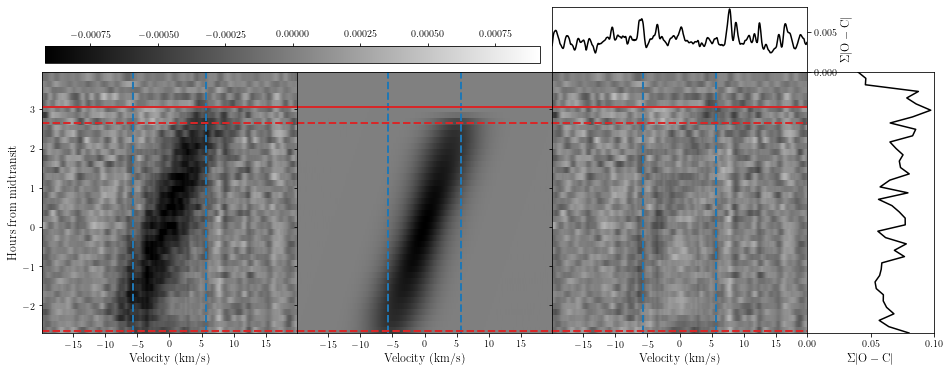

In [6]:
tracit.plot_shadow(par,dat)

We can also look at the out-of-transit CCFs. Here we'll also look at all the in-transit CCFs after subtracting our average out-of-transit CCF, i.e., the 1D shadow.

/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


Using indices [39, 40, 41] as out-of-transit spectra
## Spectroscopic system 1/HARPS-N ##:

Reduced chi-squared for the oot CCF is:
	 0.698
Factor to apply to get a reduced chi-squared around 1.0 is:
	 0.835

Number of data points: 39
Number of fitting parameters: 3
#########################


/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


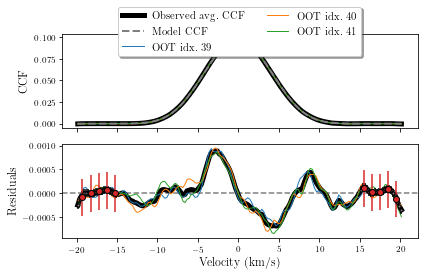

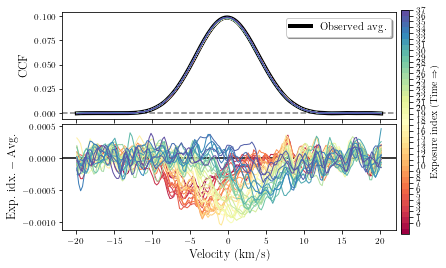

In [7]:
tracit.plot_oot_ccf2(par,dat)